In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('DATA/Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.drop('CustomerID',axis=1, inplace=True)

In [13]:
df['Gender']=df['Gender'].map({'Male':1, 'Female':0})

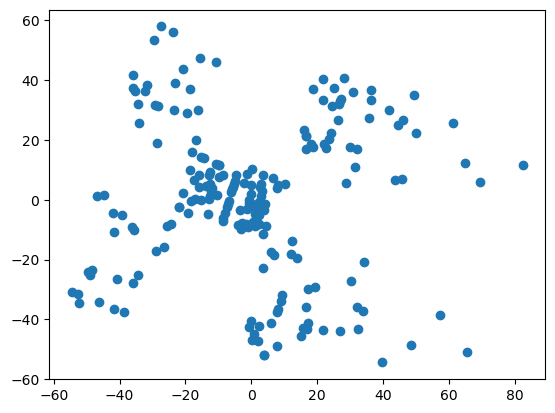

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_x = pca.fit_transform(df)
plt.scatter(pca_x[:,0], pca_x[:,1])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [60.0, 60.0, 88.125, 88.125],
  [17.5, 17.5, 74.0625, 74.0625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [45.78125, 45.78125, 161.875, 161.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [237.5, 237.5, 297.5, 297.5],
  [335.0, 33

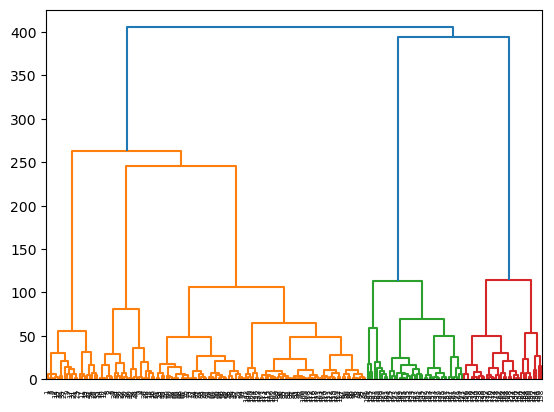

In [21]:
import scipy.cluster.hierarchy as sc
sc.dendrogram(sc.linkage(pca_x, method='ward'))

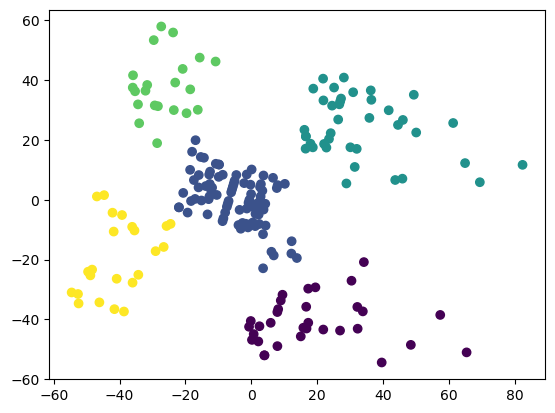

In [23]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels  = ag.fit_predict(pca_x)
plt.scatter(pca_x[:,0],pca_x[:,1], c=labels)

In [25]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples=4)
y = dbscan.fit_predict(pca_x)

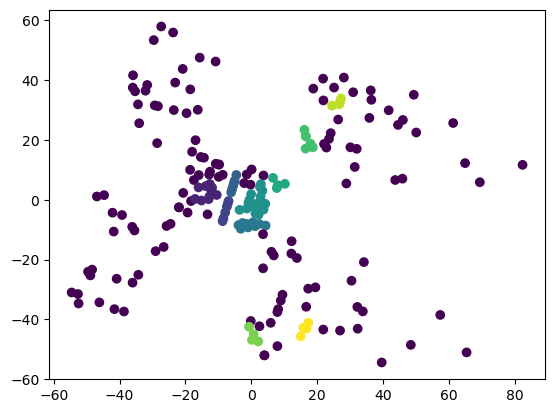

In [27]:
plt.scatter(pca_x[:,0],pca_x[:,1], c=y)

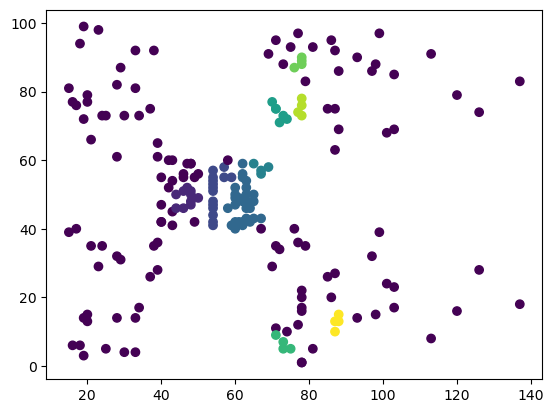

In [53]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples=4)
y = dbscan.fit_predict(df)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=y)

In [49]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18
